<center><h2>Лабораторна робота 6<h2></center>
Виконав: ФБ-21 Новіцький Олександр

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів

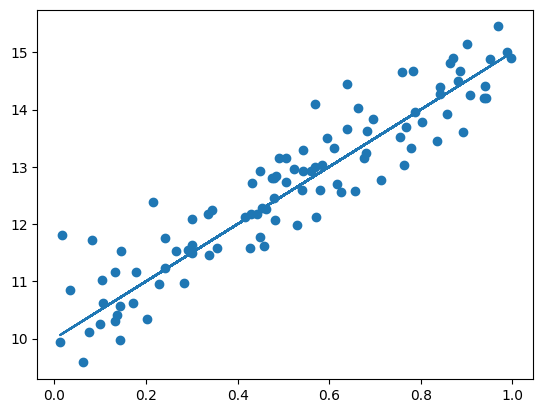

In [19]:
k = 5
b = 10

x = np.random.rand(100)
y = k * x + b + (np.random.randn(100) / 2)

plt.scatter(x, y)
plt.plot(x, k * x + b)
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k^ та b^

In [20]:
def task2(x_values, y_values):
    x_mean = np.mean(x_values)
    y_mean = np.mean(y_values)
    xy_mean = np.mean(x_values * y_values)
    x_squared_mean = np.mean(x_values ** 2)

    k_sol = (xy_mean - (x_mean * y_mean)) / (x_squared_mean - (x_mean ** 2))
    b_sol = y_mean - k_sol * x_mean

    return k_sol, b_sol

k_sol, b_sol = task2(x, y)

print("(k): ", k_sol)
print("(b): ", b_sol)

(k):  4.7244583619323235
(b):  10.222367424603725


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є) 

In [21]:
k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print(f"np.polyfit: k = {k_polyfit} b = {b_polyfit}")

print(f"Metod naym. kvad: k = {k_sol} b = {b_sol}")

np.polyfit: k = 4.724458361932315 b = 10.222367424603725
Metod naym. kvad: k = 4.7244583619323235 b = 10.222367424603725


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її

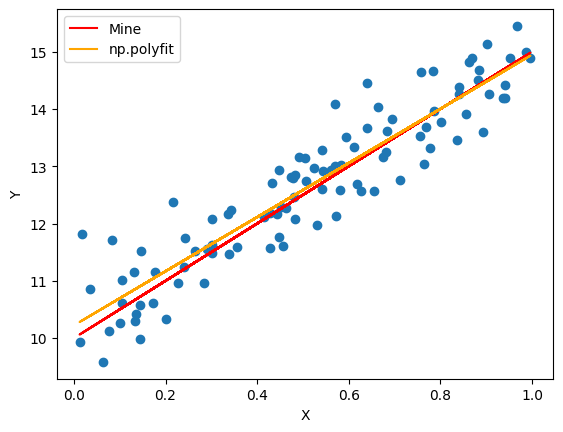

In [22]:
plt.scatter(x, y)
plt.plot(x, k*x + b, color='red', label='Mine')
plt.plot(x, k_polyfit*x + b_polyfit, color='orange', label='np.polyfit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter 

In [23]:
def gradient_descent(x, y, learning_rate=0.01, n=1000):
    k = 0
    b = 0
    
    for i in range(n):
        y_pred = k * x + b 
        
        dk = np.sum(2 * (y_pred - y) * x) / x.size
        db = np.sum(2 * (y_pred - y)) / x.size
        
        k -= learning_rate * dk
        b -= learning_rate * db
        
    return k, b

k_gd, b_gd = gradient_descent(x, y)
print(f"k = {k_gd}, b = {b_gd}")

k = 4.931379167923419, b = 10.109384871841453


2. Додайте отриману лінію регресії на загальний графік 

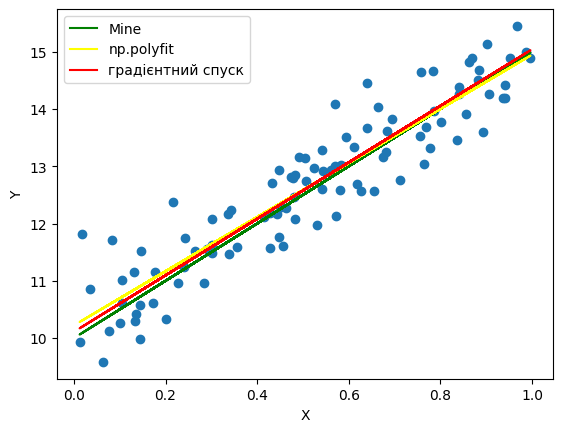

In [24]:
plt.scatter(x, y)
plt.plot(x, k*x + b, color='green', label='Mine')
plt.plot(x, k_polyfit*x + b_polyfit, color='yellow', label='np.polyfit')
plt.plot(x, k_gd*x + b_gd, color='red', label='градієнтний спуск')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

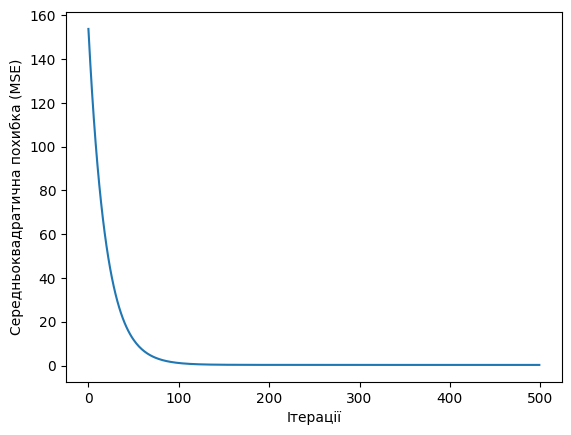

In [28]:
def compute_mse(k, b, x, y):
    y_pred = k * x + b
    mse = np.mean((y - y_pred) ** 2)
    return mse

n = 500
learning_rate = 0.01

pohubky = []
for i in range(n):
    k_gd, b_gd = gradient_descent(x, y, learning_rate, i+1)
    mse = compute_mse(k_gd, b_gd, x, y)
    pohubky.append(mse)

plt.plot(range(n), pohubky)
plt.xlabel('Ітерації')
plt.ylabel('похибка')
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання 

In [30]:
print("Comparison")
print(f"part 1 task 2 k = {k_sol}, b = {b_sol}")
print(f"part 2 task 3: k = {k_gd}, b = {b_gd}")
print(f"np.polyfit: k = {k_polyfit}, b = {b_polyfit}")

Comparison
part 1 task 2 k = 4.7244583619323235, b = 10.222367424603725
part 2 task 3: k = 5.094076789474053, b = 10.020519331214684
np.polyfit: k = 4.724458361932315, b = 10.222367424603725
